## Brain Tumour Classification


In [3]:
import numpy as np
import pandas as pd
import os
import kagglehub

In [4]:
print(np.__version__)

1.23.5


In [5]:
!pip install kagglehub

In [6]:
path = kagglehub.dataset_download("murtozalikhon/brain-tumor-multimodal-image-ct-and-mri")
print("Path to dataset files:", path)
#base_path = "/kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor MRI images"


Path to dataset files: C:\Users\ABHISUMAT\.cache\kagglehub\datasets\murtozalikhon\brain-tumor-multimodal-image-ct-and-mri\versions\1


In [7]:
dataset_root = r"C:\Users\ABHISUMAT\.cache\kagglehub\datasets\murtozalikhon\brain-tumor-multimodal-image-ct-and-mri\versions\1"
base_path = r"C:\Users\ABHISUMAT\.cache\kagglehub\datasets\murtozalikhon\brain-tumor-multimodal-image-ct-and-mri\versions\1\Dataset\Brain Tumor MRI images"

# **Three items inside the base folder**

In [8]:
print("Folders inside base path:")
print(os.listdir(base_path))  # Should show ['Healthy', 'Tumor']

Folders inside base path:
['Healthy', 'MRI image source.txt', 'Tumor']


# **# Showing 3 images from each category**


Showing images from category: Healthy


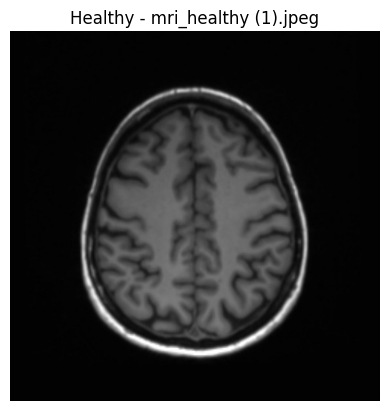

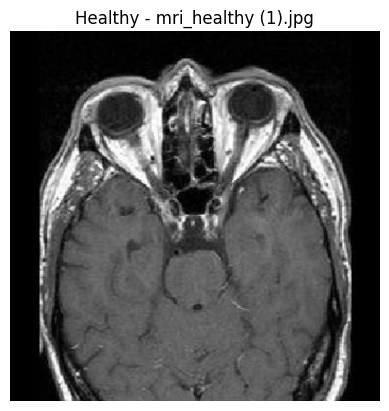

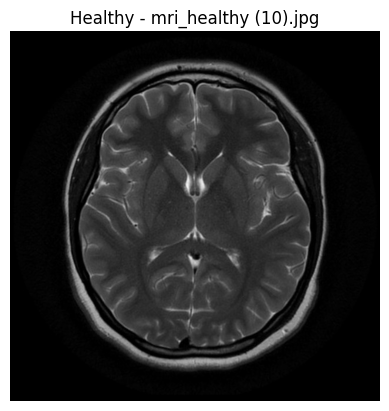


Showing images from category: Tumor


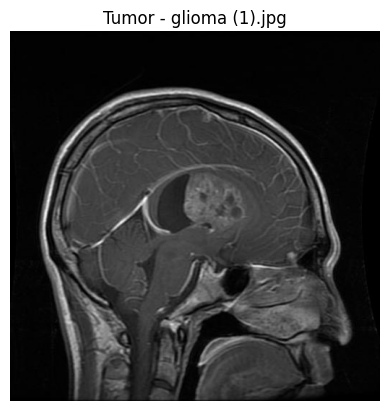

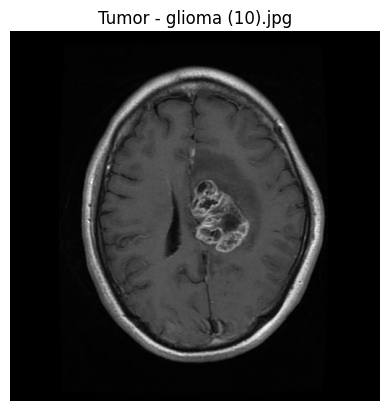

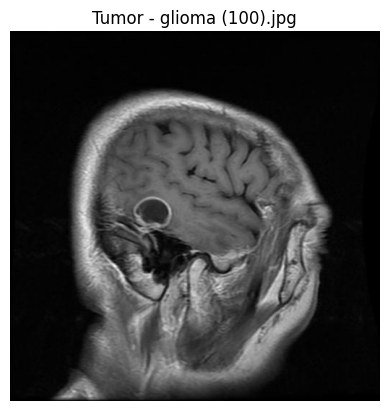

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

categories = ["Healthy", "Tumor"]
num_images = 3

for category in categories:
    print(f"\nShowing images from category: {category}")
    category_path = os.path.join(base_path, category)
    image_files = os.listdir(category_path)[:num_images]

    for image_file in image_files:
        image_path = os.path.join(category_path, image_file)
        img = Image.open(image_path)
        plt.imshow(img, cmap='gray')
        plt.title(f"{category} - {image_file}")
        plt.axis('off')
        plt.show()

# **Display the directory structure**

In [10]:
def print_directory_tree(start_path, indent=''):
    for item in os.listdir(start_path):
        path = os.path.join(start_path, item)
        if os.path.isdir(path):
            print(f"{indent}📂 {item}/")
            print_directory_tree(path, indent + '    ')
        else:
            print(f"{indent}📄 {item}")

print("📁 Dataset Directory Tree:\n")
print_directory_tree(base_path)

📁 Dataset Directory Tree:

📂 Healthy/
    📄 mri_healthy (1).jpeg
    📄 mri_healthy (1).jpg
    📄 mri_healthy (10).jpg
    📄 mri_healthy (100).jpg
    📄 mri_healthy (1000).jpg
    📄 mri_healthy (1001).jpg
    📄 mri_healthy (1002).jpg
    📄 mri_healthy (1003).jpg
    📄 mri_healthy (1004).jpg
    📄 mri_healthy (1005).jpg
    📄 mri_healthy (1006).jpg
    📄 mri_healthy (1007).jpg
    📄 mri_healthy (1008).jpg
    📄 mri_healthy (1009).jpg
    📄 mri_healthy (101).jpg
    📄 mri_healthy (1010).jpg
    📄 mri_healthy (1011).jpg
    📄 mri_healthy (1012).jpg
    📄 mri_healthy (1013).jpg
    📄 mri_healthy (1014).jpg
    📄 mri_healthy (1015).jpg
    📄 mri_healthy (1016).jpg
    📄 mri_healthy (1017).jpg
    📄 mri_healthy (1018).jpg
    📄 mri_healthy (1019).jpg
    📄 mri_healthy (102).jpg
    📄 mri_healthy (1020).jpg
    📄 mri_healthy (1021).jpg
    📄 mri_healthy (1022).jpg
    📄 mri_healthy (1023).jpg
    📄 mri_healthy (1024).jpg
    📄 mri_healthy (1025).jpg
    📄 mri_healthy (1026).jpg
    📄 mri_healt

# **Count Images in Each Category**

In [11]:
categories = ["Healthy", "Tumor"]
category_counts = {}

for category in categories:
    category_path = os.path.join(base_path, category)
    if os.path.exists(category_path):
        num_images = len([img for img in os.listdir(category_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
        category_counts[category] = num_images
    else:
        category_counts[category] = 0

print("Image count in each category:")
for cat, count in category_counts.items():
    print(f"{cat}: {count} images")

Image count in each category:
Healthy: 2000 images
Tumor: 3000 images


In [12]:
image_paths = [] 
labels = [] 
for category in categories:
    category_path = os.path.join(base_path, category) 
    for image_name in os.listdir(category_path): 
        image_path = os.path.join(category_path, image_name) 
        image_paths.append(image_path) 
        labels.append(category)

In [13]:
df = pd.DataFrame({ "image_path": image_paths, "label": labels })

In [14]:
df.shape

(5000, 2)

In [15]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  5000 non-null   object
 1   label       5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [19]:
df['label'].unique()

array(['Healthy', 'Tumor'], dtype=object)

In [20]:
df.head()

,image_path,label
0,C:\Users\ABHISUMAT\.cache\kagglehub\datasets\m...,Healthy
1,C:\Users\ABHISUMAT\.cache\kagglehub\datasets\m...,Healthy
2,C:\Users\ABHISUMAT\.cache\kagglehub\datasets\m...,Healthy
3,C:\Users\ABHISUMAT\.cache\kagglehub\datasets\m...,Healthy
4,C:\Users\ABHISUMAT\.cache\kagglehub\datasets\m...,Healthy


In [21]:
df['label'].value_counts()

label
Tumor      3000
Healthy    2000
Name: count, dtype: int64

C:\Users\ABHISUMAT\AppData\Local\Temp\ipykernel_20820\2942001750.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="viridis", ax=ax)


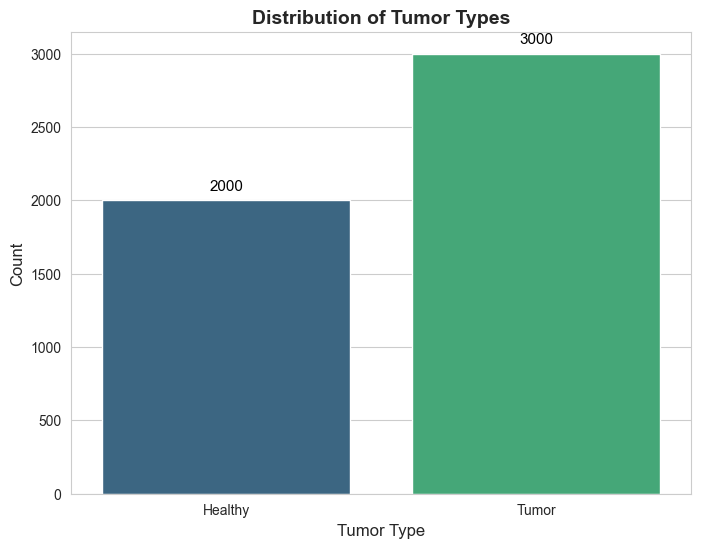

In [22]:
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6)) 
sns.countplot(data=df, x="label", palette="viridis", ax=ax) 
ax.set_title("Distribution of Tumor Types", fontsize=14, fontweight='bold') 
ax.set_xlabel("Tumor Type", fontsize=12) 
ax.set_ylabel("Count", fontsize=12) 

for p in ax.patches: 
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11, color='black', 
                xytext=(0, 5), textcoords='offset points') 
plt.show()

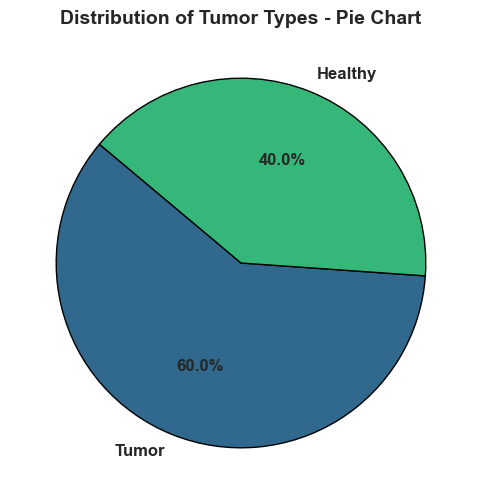

In [23]:
label_counts = df["label"].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("viridis", len(label_counts))

ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
       startangle=140, colors=colors, textprops={'fontsize': 12, 'weight': 'bold'},
       wedgeprops={'edgecolor': 'black', 'linewidth': 1})

ax.set_title("Distribution of Tumor Types - Pie Chart", fontsize=14, fontweight='bold')

plt.show()

In [24]:
import cv2

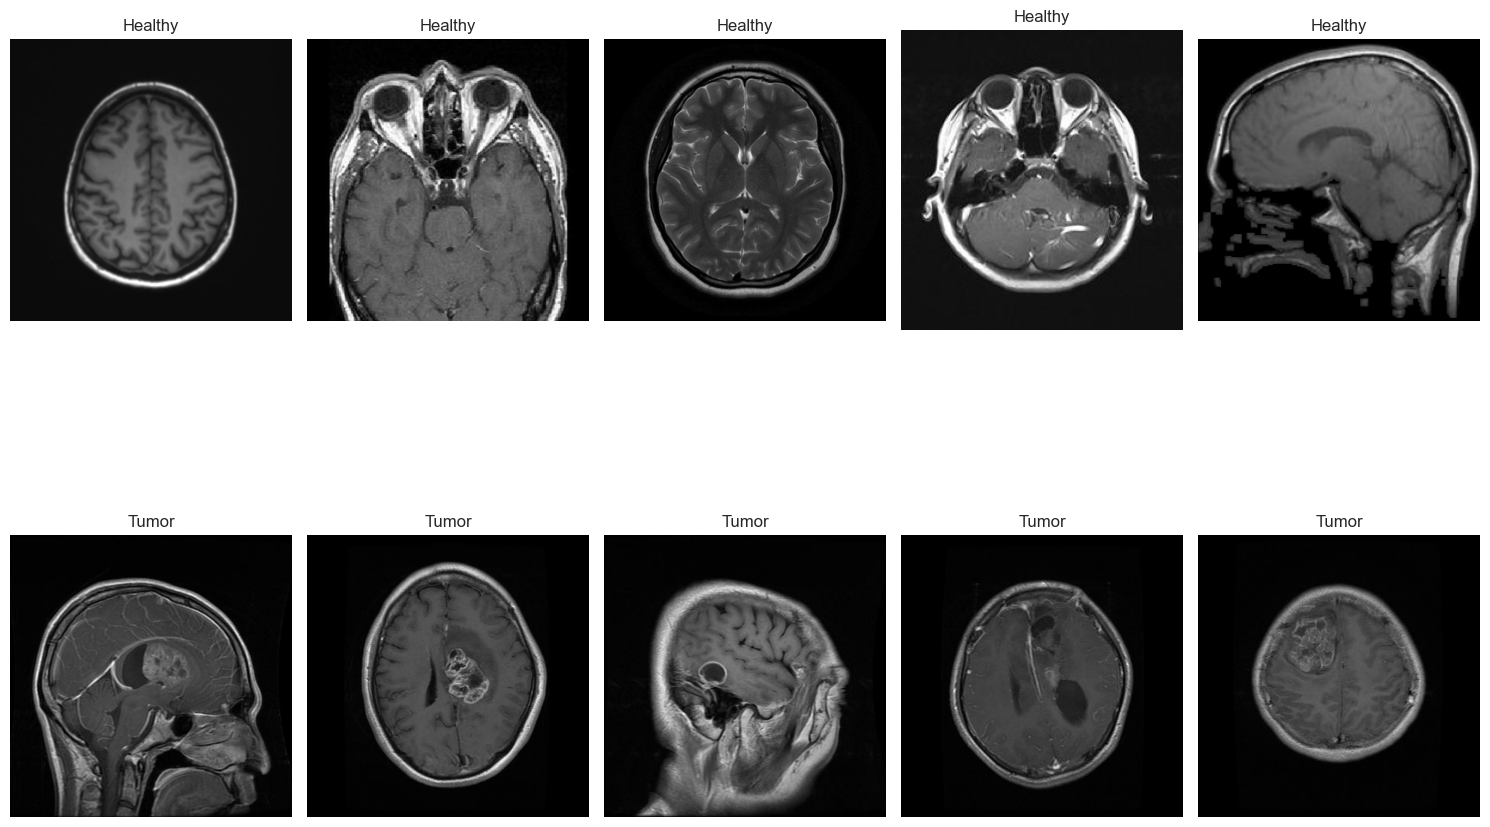

In [25]:
num_images = 5
plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]
    for j, img_path in enumerate(category_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        plt.subplot(len(categories), num_images, i * num_images + j + 1) 
        plt.imshow(img) 
        plt.axis('off') 
        plt.title(category)

plt.tight_layout() 
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()

In [27]:
df['category_encoded'] = label_encoder.fit_transform(df['label'])
df = df[['image_path', 'category_encoded']]

In [29]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42) 

X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

df_resampled = pd.DataFrame(X_resampled, columns=['image_path']) 
df_resampled['category_encoded'] = y_resampled

print("\nClass distribution after oversampling:") 
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    3000
1    3000
Name: count, dtype: int64


C:\Users\ABHISUMAT\anaconda3\envs\GPU\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\ABHISUMAT\anaconda3\envs\GPU\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [30]:
df_resampled

,image_path,category_encoded
0,C:\Users\ABHISUMAT\.cache\kagglehub\datasets\m...,0
1,C:\Users\ABHISUMAT\.cache\kagglehub\datasets\m...,0
2,C:\Users\ABHISUMAT\.cache\kagglehub\datasets\m...,0
3,C:\Users\ABHISUMAT\.cache\kagglehub\datasets\m...,0
4,C:\Users\ABHISUMAT\.cache\kagglehub\datasets\m...,0
...,...,...
5995,C:\Users\ABHISUMAT\.cache\kagglehub\datasets\m...,0
5996,C:\Users\ABHISUMAT\.cache\kagglehub\datasets\m...,0
5997,C:\Users\ABHISUMAT\.cache\kagglehub\datasets\m...,0
5998,C:\Users\ABHISUMAT\.cache\kagglehub\datasets\m...,0


In [31]:
!pip install numpy==1.23.5

In [32]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization 
from tensorflow.keras import regularizers 
import warnings

In [33]:
warnings.filterwarnings("ignore") 
print ('check')

check


In [34]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report

train_df_new, temp_df_new = train_test_split( df_resampled, 
                                             train_size=0.8, 
                                             shuffle=True, 
                                             random_state=42, 
                                             stratify=df_resampled['category_encoded'] )

valid_df_new, test_df_new = train_test_split( temp_df_new, 
                                             test_size=0.5, 
                                             shuffle=True, 
                                             random_state=42,
                                             stratify=temp_df_new['category_encoded'])

batch_size = 16 
img_size = (224, 224) 
channels = 3 
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255) 
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe( train_df_new, 
                                           x_col='image_path', 
                                           y_col='category_encoded', 
                                           target_size=img_size, 
                                           class_mode='binary', 
                                           color_mode='rgb', 
                                           shuffle=True, 
                                           batch_size=batch_size )

valid_gen_new = ts_gen.flow_from_dataframe( valid_df_new, 
                                           x_col='image_path', 
                                           y_col='category_encoded', 
                                           target_size=img_size, 
                                           class_mode='binary', 
                                           color_mode='rgb', 
                                           shuffle=True, 
                                           batch_size=batch_size )

test_gen_new = ts_gen.flow_from_dataframe( test_df_new, x_col='image_path',
                                          y_col='category_encoded', 
                                          target_size=img_size, 
                                          class_mode='binary', 
                                          color_mode='rgb', 
                                          shuffle=False, 
                                          batch_size=batch_size )

Found 4800 validated image filenames belonging to 2 classes.
Found 600 validated image filenames belonging to 2 classes.
Found 600 validated image filenames belonging to 2 classes.


In [35]:
import tensorflow as tf 
from tensorflow import keras
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [36]:
gpus = tf.config.list_physical_devices('GPU') 

if gpus: 
    try: 
        for gpu in gpus: 
            tf.config.experimental.set_memory_growth(gpu, True) 
        print("GPU is set for TensorFlow") 
    except RuntimeError as e: 
        print(e)

GPU is set for TensorFlow


In [37]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
from typing import Tuple, Optional

In [38]:
class AreaAttentionLayer(keras.layers.Layer): 
    def __init__(self, reduction_ratio: int = 8, **kwargs): 
        super(AreaAttentionLayer, self).__init__(**kwargs) 
        self.reduction_ratio = reduction_ratio 
        self.conv1 = layers.Conv2D(32, kernel_size=1, activation='relu') 
        self.conv2 = layers.Conv2D(1, kernel_size=3, padding='same', activation='sigmoid') 
        self.bn = layers.BatchNormalization()

    def build(self, input_shape): 
        super().build(input_shape)

    def call(self, inputs): 
        batch_size = tf.shape(inputs)[0] 
        height, width, channels = inputs.shape[1], inputs.shape[2], inputs.shape[3] 
        area_height = max(1, height // 4) 
        area_width = max(1, width // 4) 
        pad_height = (area_height - (height % area_height)) % area_height 
        pad_width = (area_width - (width % area_width)) % area_width

        if pad_height > 0 or pad_width > 0: 
            inputs_padded = tf.pad(inputs, [[0, 0], 
                                            [0, pad_height], 
                                            [0, pad_width], 
                                            [0, 0]])
            new_height = height + pad_height 
            new_width = width + pad_width 
        else: 
            inputs_padded = inputs 
            new_height, new_width = height, width

        x = tf.reshape( inputs_padded, [batch_size, new_height // area_height, area_height, new_width // area_width, area_width, channels] ) 
        x = tf.transpose(x, [0, 1, 3, 2, 4, 5]) 
        x = tf.reshape( x, [batch_size * (new_height // area_height) * (new_width // area_width), area_height, area_width, channels])

        attention = self.conv1(x) 
        attention = self.bn(attention) 
        attention = self.conv2(attention) 
        attention = tf.reshape( attention, [batch_size, new_height // area_height, new_width // area_width, area_height, area_width, 1] ) 
        attention = tf.transpose(attention, [0, 1, 3, 2, 4, 5]) 
        attention = tf.reshape(attention, [batch_size, new_height, new_width, 1]) 
        
        if pad_height > 0 or pad_width > 0: 
            attention = attention[:, :height, :width, :] 
            output = inputs * attention 
        else: 
            output = inputs_padded * attention 
        return output

    def get_config(self): 
        config = super().get_config() 
        config.update({ 'reduction_ratio': self.reduction_ratio }) 
        return config

In [40]:
class CNNBlock(keras.layers.Layer): 
    def __init__(self, filters: int, use_attention: bool = True, **kwargs): 
        super(CNNBlock, self).__init__(**kwargs) 
        self.filters = filters 
        self.use_attention = use_attention 
        if self.use_attention: 
            self.area_attention = AreaAttentionLayer() 
            self.conv = keras.Sequential([ layers.Conv2D(filters, kernel_size=3, padding='same', use_bias=False), 
                                          layers.BatchNormalization(), 
                                          layers.ReLU(), 
                                          layers.Conv2D(filters, kernel_size=3, padding='same', use_bias=False), 
                                          layers.BatchNormalization() ]) 
        self.shortcut = keras.Sequential()

    def build(self, input_shape): 
        if self.filters != input_shape[-1]:
            self.shortcut = keras.Sequential([ layers.Conv2D(self.filters, kernel_size=1, padding='same', use_bias=False), 
                                              layers.BatchNormalization() ]) 
        super().build(input_shape)

    def call(self, inputs): 
        if self.use_attention: 
            x = self.area_attention(inputs) 
        else: 
            x = inputs 
            x = self.conv(x) 
        shortcut = self.shortcut(inputs) if len(self.shortcut.layers) > 0 else inputs 
        x += shortcut 
        return tf.nn.relu(x)

    def get_config(self): 
        config = super().get_config() 
        config.update({ 'filters': self.filters, 'use_attention': self.use_attention })
        return config

In [42]:
class RESNet(keras.Model): 
    def __init__(self, num_classes: int = 2, dropout_rate: float = 0.3, initial_filters: int = 32, **kwargs): 
        super(RESNet, self).__init__(**kwargs) 
        self.num_classes = num_classes 
        self.dropout_rate = dropout_rate 
        self.initial_filters = initial_filters 
        self.stem = keras.Sequential([ layers.Conv2D(self.initial_filters, kernel_size=7, strides=2, padding='same', use_bias=False), 
                                      layers.BatchNormalization(), 
                                      layers.ReLU(), 
                                      layers.MaxPooling2D(pool_size=3, strides=2, padding='same') ]) 
        self.blocks = [ CNNBlock(self.initial_filters * (2**i), use_attention=True) for i in range(3) ]

        self.downsamples = [ keras.Sequential([ layers.Conv2D(self.initial_filters * (2**(i+1)), kernel_size=3, strides=2, padding='same', use_bias=False), 
                                               layers.BatchNormalization(), 
                                               layers.ReLU() ]) for i in range(2) ]
        self.final_attention = AreaAttentionLayer() 
        self.global_pool = layers.GlobalAveragePooling2D() 
        self.dropout = layers.Dropout(self.dropout_rate) 
        self.fc = layers.Dense(1 if num_classes == 2 else num_classes, activation='sigmoid' if num_classes == 2 else 'softmax')

    def call(self, inputs, training=None): 
        x = self.stem(inputs) 
        for i, block in enumerate(self.blocks): 
            x = block(x) 
            if i < len(self.downsamples): 
                x = self.downsamples[i](x) 
            if training: 
                x = self.dropout(x)
        x = self.final_attention(x) 
        x = self.global_pool(x) 
        if training: 
            x = self.dropout(x) 
        return self.fc(x)

    def get_config(self): 
        config = super().get_config() 
        config.update({ 'num_classes': self.num_classes, 'dropout_rate': self.dropout_rate, 'initial_filters': self.initial_filters }) 
        return config

    def build_model(input_shape: Tuple[int, int, int] = (224, 224, 3), num_classes: int = 2, learning_rate: float = 1e-3): 
        model = RESNet(num_classes=num_classes) 
        model.compile( optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy' if num_classes == 2 else 'sparse_categorical_crossentropy', metrics=['accuracy'] ) 
        model.build(input_shape=(None, *input_shape)) 
        return model 
        
    if __name__ == "__main__": 
        model = build_model(input_shape=(224, 224, 3), num_classes=2) 
        model.summary()
    history = model.fit( train_gen_new, validation_data=valid_gen_new, epochs=10, batch_size=16, verbose=1 )

Model: "res_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 56, 56, 32)        4832      
_________________________________________________________________


ValueError: Weights for model sequential_1 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.